In [1]:
import pandas as pd


In [4]:
datas=pd.read_csv("C:\\Users\\Ankush Niwane\\Downloads\\bodyPerformance.csv",usecols=('age','height_cm','weight_kg'))

In [5]:
datas.head()

,age,height_cm,weight_kg
0,27.0,172.3,75.24
1,25.0,165.0,55.80
2,31.0,179.6,78.00
3,32.0,174.5,71.10
4,28.0,173.8,67.70


In [6]:
datas.isnull().sum()

age          0
height_cm    0
weight_kg    0
dtype: int64

In [12]:
#scaling data
from sklearn.preprocessing import StandardScaler
le=StandardScaler()
datas1=le.fit_transform(datas)

In [13]:
datas1

array([[-0.71743212,  0.44387298,  0.65215002],
       [-0.8642197 , -0.42246548, -0.97473438],
       [-0.42385695,  1.31021144,  0.88312744],
       ...,
       [ 0.16329338,  1.02538783,  1.09234611],
       [ 1.99813815, -2.66545136, -0.81572819],
       [-0.20367558, -0.54114198, -0.11275345]])

In [47]:
#reducsing data
from sklearn.decomposition import PCA
less=PCA(n_components=2)
rs=less.fit_transform(datas1)

In [25]:
from sklearn.cluster import KMeans
mssc=[]
mapping={}
K=range(1,11)
for k in K:
    model=KMeans(n_clusters=k)
    model.fit(rs)
    mssc.append(model.inertia_)
    mapping[k]=model.inertia_

In [27]:
for i,j in mapping.items():
    print(i,';',j)

1 ; 36983.87733103958
2 ; 20174.696284645946
3 ; 12866.218941769206
4 ; 9438.240616296673
5 ; 7052.479362101091
6 ; 6140.681223313535
7 ; 5309.342338406403
8 ; 4697.03637458989
9 ; 4159.366101308915
10 ; 3726.517168482809


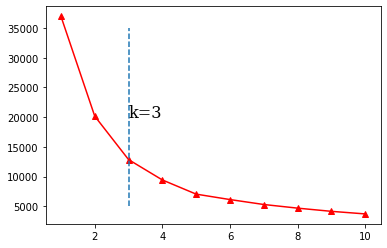

In [41]:
import matplotlib.pyplot as plt
plt.plot(K,mssc,'-r^')
plt.plot([3,3],[5000,35000],linestyle='--')
plt.text(3,20000,'k=3',fontdict={'family':'serif','size':16})
plt.show()

In [39]:
from kneed import KneeLocator
le=KneeLocator(range(1,11),mssc,curve='convex',direction='decreasing')
le.elbow

3

In [42]:
modelk=KMeans(n_clusters=3)
modelk.fit(rs)
preds=modelk.predict(rs)
preds

array([0, 2, 0, ..., 0, 1, 2])

In [44]:

ds=pd.DataFrame()
ds['PC1']=rs[:,0]
ds['PC2']=rs[:,1]
ds['target']=preds

In [45]:
ds.head()

,PC1,PC2,target
0,-0.960395,-0.388000,0
1,0.645242,-1.193794,2
2,-1.612651,0.048061,0
3,-0.797132,-0.149084,0
4,-0.649823,-0.532148,0


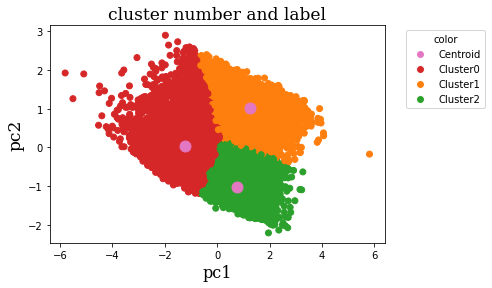

In [48]:
from matplotlib.lines import Line2D
cluster_colors={0:'tab:red',1:'tab:orange',2:'tab:green',3:'tab:blue'}
cluster_dict={'Centroid':'tab:pink','Cluster0':'tab:red','Cluster1':'tab:orange','Cluster2':'tab:green'}


plt.scatter(x=ds['PC1'],y=ds['PC2'],c=ds['target'].map(cluster_colors))

handles=[Line2D([0],[0],marker='o',color='w',markerfacecolor=v,label=k,markersize=8)for k,v in cluster_dict.items()]
plt.legend(title='color',handles=handles,bbox_to_anchor=(1.05,1),loc='upper left')


# for centriod visultion
plt.scatter(x=modelk.cluster_centers_[:,0],y=modelk.cluster_centers_[:,1],marker='o',c='tab:pink',s=120,alpha=1)

plt.title('cluster number and label',fontdict={'family':'serif','size':17})
plt.xlabel('pc1',fontdict={'family':'serif','size':16})
plt.ylabel('pc2',fontdict={'family':'serif','size':17})
plt.show()